In [1]:
from pathlib import Path
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm
import itertools

In [2]:
col_names=['x1','x2','x3','y1','y2','y3']
df = pd.read_csv('corr.csv', 
                 sep=",", 
                 skiprows=1,
#                  usecols=[:],
                 names=col_names)

## Pearson and Spearman correlation - Question 1

In [3]:
pearson = df.corr(method='pearson')
print(pearson)
spearman = df.corr(method='spearman')
print(spearman)

          x1        x2        x3        y1        y2        y3
x1  1.000000  1.000000  0.032733  0.580098  0.339721  0.339721
x2  1.000000  1.000000  0.032733  0.580098  0.339721  0.339721
x3  0.032733  0.032733  1.000000 -0.197447 -0.901029 -0.901029
y1  0.580098  0.580098 -0.197447  1.000000  0.573215  0.573215
y2  0.339721  0.339721 -0.901029  0.573215  1.000000  1.000000
y3  0.339721  0.339721 -0.901029  0.573215  1.000000  1.000000
          x1        x2        x3        y1        y2        y3
x1  1.000000  1.000000  0.875047  0.572420  0.572420  0.572420
x2  1.000000  1.000000  0.875047  0.572420  0.572420  0.572420
x3  0.875047  0.875047  1.000000  0.431895  0.431895  0.431895
y1  0.572420  0.572420  0.431895  1.000000  1.000000  1.000000
y2  0.572420  0.572420  0.431895  1.000000  1.000000  1.000000
y3  0.572420  0.572420  0.431895  1.000000  1.000000  1.000000


## x1 and y1

<Figure size 432x288 with 0 Axes>

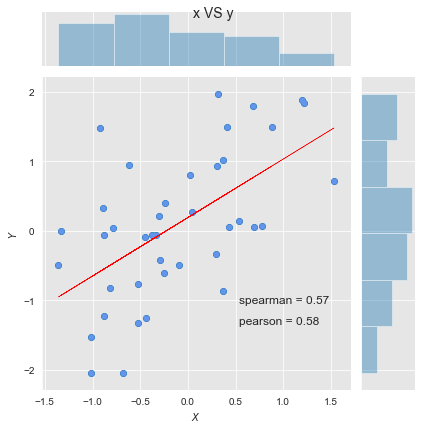

In [4]:
fig1 = plt.figure()
x = df['x1']
y=df['y1']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'y1 = '+str(round(m,2)) + ' *' + ' x1 '  + str(round(b,2)) 
pc='pearson = '+ str(round(pearson.iloc[0,3],2))
sc='spearman = '+ str(round(spearman.iloc[0,3],2))

# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# plt.scatter(x, y,color='cornflowerblue',marker='o')
# plt.plot(x, reg_line, color="red",linewidth='0.5')
# plt.annotate(pc, xy=(min(x),max(y)-0.1), fontsize=12) 
# plt.annotate(sc, xy=(min(x),max(y)-0.4), fontsize=12) 
# plt.title('x VS y')
# plt.xlabel('x')
# plt.ylabel('y')

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
g =sns.jointplot(x='x1', y='y1', data=df);
g.plot_joint(plt.scatter, c='cornflowerblue', s=30, linewidth=0.5)
plt.plot(x, reg_line, color="red",linewidth='0.5')
plt.annotate(pc, xy=(max(x)-1,min(y)+0.7), fontsize=12) 
plt.annotate(sc, xy=(max(x)-1,min(y)+1), fontsize=12) 
g.set_axis_labels("$X$", "$Y$");
g.fig.suptitle('x VS y',fontsize=14)
plt.savefig('x1y1')

## x2 and y2

<Figure size 432x288 with 0 Axes>

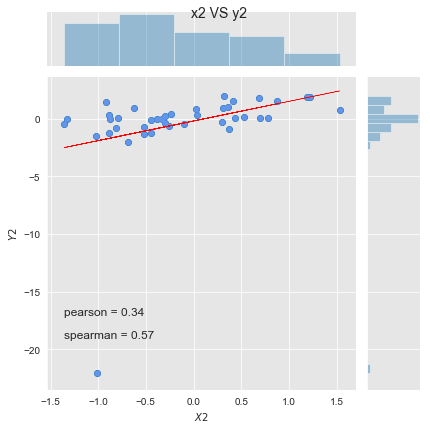

In [5]:
fig2 = plt.figure()
x = df['x2']
y=df['y2']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'y2 = '+str(round(m,2)) + ' *' + ' x2 '  + str(round(b,2)) 
pc='pearson = '+ str(round(pearson.iloc[1,4],2))
sc='spearman = '+ str(round(spearman.iloc[1,4],2))

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
g =sns.jointplot(x='x2', y='y2', data=df);
g.plot_joint(plt.scatter, c='cornflowerblue', s=30, linewidth=0.5)
plt.plot(x, reg_line, color="red",linewidth='0.5')
plt.annotate(pc, xy=(min(x),min(y)+5), fontsize=12) 
plt.annotate(sc, xy=(min(x),min(y)+3), fontsize=12) 
g.set_axis_labels("$X2$", "$Y2$");
g.fig.suptitle('x2 VS y2',fontsize=14)

# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# plt.scatter(x, y,color='cornflowerblue',marker='o')
# plt.plot(x, reg_line, color="red",linewidth='0.5')
# plt.annotate(pc, xy=(min(x),min(y)+5), fontsize=12) 
# plt.annotate(sc, xy=(min(x),min(y)+3), fontsize=12) 
# plt.title('x2 VS y2')
# plt.xlabel('x2')
# plt.ylabel('y2')
plt.savefig('x2y2')

## x3 and y3

<Figure size 432x288 with 0 Axes>

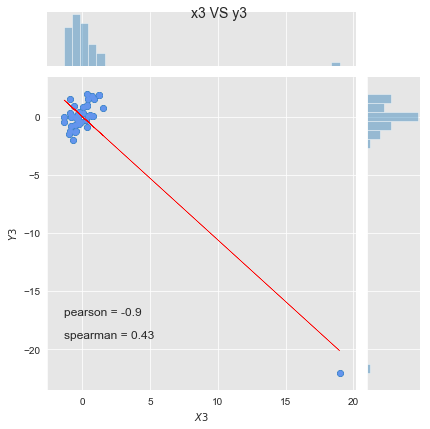

In [6]:
fig3 = plt.figure()
x = df['x3']
y=df['y3']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'y3 = '+str(round(m,2)) + ' *' + ' x3 '  + str(round(b,2)) 
pc='pearson = '+ str(round(pearson.iloc[2,5],2))
sc='spearman = '+ str(round(spearman.iloc[2,5],2))

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
g =sns.jointplot(x='x3', y='y3', data=df);
g.plot_joint(plt.scatter, c='cornflowerblue', s=30, linewidth=0.5)

plt.plot(x, reg_line, color="red",linewidth='0.5')
plt.annotate(pc, xy=(min(x),min(y)+5), fontsize=12) 
plt.annotate(sc, xy=(min(x),min(y)+3), fontsize=12) 
g.set_axis_labels("$X3$", "$Y3$");
g.fig.suptitle('x3 VS y3',fontsize=14)

# plt.scatter(x, y,color='cornflowerblue',marker='o')
# plt.title('x3 VS y3')
# plt.xlabel('x3')
# plt.ylabel('y3')
plt.savefig('x3y3')
# sns.jointplot(x='x3', y='y3', data=df);


## Question 2

In [7]:
print(spearman.iloc[:3,3:])
print(pearson.iloc[:3,3:])

          y1        y2        y3
x1  0.572420  0.572420  0.572420
x2  0.572420  0.572420  0.572420
x3  0.431895  0.431895  0.431895
          y1        y2        y3
x1  0.580098  0.339721  0.339721
x2  0.580098  0.339721  0.339721
x3 -0.197447 -0.901029 -0.901029


## Q1 discussion:

Briefly discuss the results (e.g. which correlation coefficient is more resistant to outliers and why?; in potential cases with different data but same correlation coefficients: why are the coefficients unchanged while the data is altered?)

The following rankings were derived:


When there is a linear relationship and no outliers the pearson and sprearman rank are almost the same. As seen in the first graph for x vs y (figure 1), this is true for distributions that are generally normal. However the pearson correlation scored 0.01 higher than the sprearman in this particular example for figure 1. In figure 2 we notice that an outlier is added in the y2 dataset. This seems to throw off the Pearson correlation more than the spearman. As seen in figure 2, the y-axis histogram showing distribution, displays a point away from the median. The data is still more or less normally distributed, and the spearman ranking performs better than the pearson. This would suggest that the Spearman ranking performs better when there is an outlier in the dependant variable. In figure 3, the distribution is still normal but outliers exist in both the x3 and y3 datasets. In this case both ranking show very low correlation, the Spearman still showing stronger than the Pearson. This would mean the Spearman ranking is usually more robust to outliers.The Pearson correlation coefficient measures the strength of the linear relationship between normally distributed variables. When the variables are not normally distributed or the relationship between the variables is not linear, it may be more appropriate to use the Spearman rank correlation method.

## Q2 discussion:

In [8]:
col_names=['x1','x2','x3','x4','x5','x6','y']
df = pd.read_csv('MLR.csv', 
                 sep=",", 
                 skiprows=1,
#                  usecols=[:],
                 names=col_names)
X=df.iloc[:,:-1]
y=df['y']

In [9]:
# mlr = smf.ols(formula='y ~ x1 + x2 + x3 + x4 + x5 + x6', data=df).fit()
# mlr.summary()


Text(0.5,1,'Visualizing Normalization')

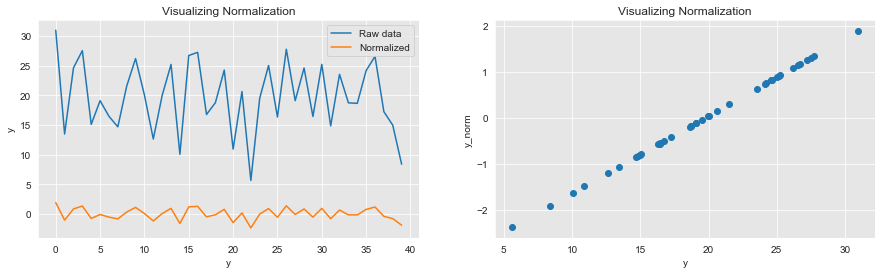

In [10]:
data=df
data_norm = (data - data.mean())/data.std()
data_norm.head()
#visualize normalization

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.plot(data['y'])
plt.plot(data_norm['y'])
plt.legend(['Raw data','Normalized'])
plt.ylabel('y')
plt.xlabel('y')
plt.title('Visualizing Normalization')

plt.subplot(1,2,2)
plt.scatter(data['y'],data_norm['y'])
plt.ylabel('y_norm')
plt.xlabel('y')
plt.title('Visualizing Normalization')

In [11]:
#unpack normalized data
x1 = data_norm['x1']
x2 = data_norm['x2']
x3 = data_norm['x3']
x4 = data_norm['x4']
x5 = data_norm['x5']
x6 = data_norm['x6']
y = data_norm['y']
X = data_norm.drop('y',axis=1)

In [12]:
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,y)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,y) #R-squared value from MLR model
coef_MLR

array([ 0.07727992,  0.03667406, -0.35514925, -0.57068481,  0.01919748,
        0.46552718])

Text(0.5,1,'MLR Model Results: R^2 = 0.98')

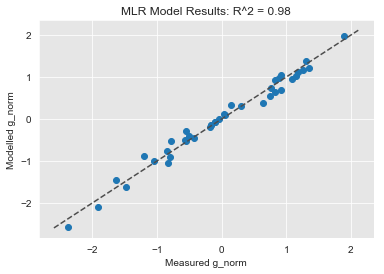

In [13]:
#visualize MLR model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_MLR)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured g_norm')
plt.ylabel('Modelled g_norm')
plt.title('MLR Model Results: R^2 = ' + str(R2_MLR)[:4])

## Apply stepwise

In [14]:
#NOTE: stepwise_selection function used from: 
#https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447#24447

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [15]:
result = stepwise_selection(X, y)
print('resulting features:')
print(result)

c:\users\pearl\miniconda3\envs\e350\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\users\pearl\miniconda3\envs\e350\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  x6                             with p-value 1.01879e-09
Add  x4                             with p-value 3.45675e-17
Add  x3                             with p-value 7.44399e-07
Add  x1                             with p-value 0.00532758
resulting features:
['x6', 'x4', 'x3', 'x1']


In [16]:
#do MLR using predictors chosen from stepwise regression

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],y)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],y) #R-squared value from MLR model


Text(0.5,1,'Stepwise Model Results: R^2 = 0.97')

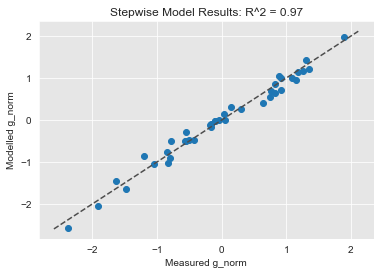

In [17]:
#visualize stepwise model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_step)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured g_norm')
plt.ylabel('Modelled g_norm')
plt.title('Stepwise Model Results: R^2 = ' + str(R2_step)[:4])

In [18]:
#goal: loop through every combination of normalized predictors, make linear model, and find one with best performance

R2_best = []
combo_best = []

for kk in range(1,10): #for each total number of predictors to use in model (from 1 predictor to 9 predictors)
    
    v0 = range(np.shape(X)[1])
    combinations = list(itertools.combinations(range(np.shape(X)[1]),kk)) #all possible combinations of kk total predictors 
    R2_test = []
    
    for ind in range(len(combinations)): #for each combination of predictors, make MLR model and compute R^2

        test_vars = np.array(combinations[ind])
        X_test = X.iloc[::2,test_vars]
        y_test = y.iloc[::2]
        
        X_valid = X.iloc[1::2,test_vars]
        y_valid = y.iloc[1::2]

        lm_test = linear_model.LinearRegression()
        model_test = lm_test.fit(X_test,y_test)
        ypred_test = lm_test.predict(X_test) #y predicted by MLR
        R2_test.append(lm_test.score(X_valid,y_valid)) #R-squared value from MLR model

        try:
            R2_best.append(np.max(R2_test))
            combo_best.append(combinations[np.argmax(R2_test)])
      
        except ValueError:  #raised if `y` is empty.
            pass
#     R2_best.append(np.max(R2_test))
    
    
R2_best_final = np.max(R2_best)
combo_best_final = combo_best[np.argmax(R2_best)]

print('The best combination of predictors is: ' )
print(list(X.columns[np.asarray(combo_best_final)]))

The best combination of predictors is: 
['x1', 'x3', 'x4', 'x6']


In [19]:
#build linear model using the best combination of predictors

X_calib_valid = X.iloc[:,np.asarray(combo_best_final)]

lm_calib_valid = linear_model.LinearRegression()
model_calib_valid = lm_calib_valid.fit(X_calib_valid,y)
ypred_calib_valid = lm_calib_valid.predict(X_calib_valid) #y predicted by MLR
intercept_calib_valid = lm_calib_valid.intercept_ #intercept predicted by MLR
coef_calib_valid = lm_calib_valid.coef_ #regression coefficients in MLR model
R2_calib_valid = lm_calib_valid.score(X_calib_valid,y) #R-squared value from MLR model
coef_calib_valid

array([ 0.07509328, -0.33467431, -0.57085602,  0.48809648])

Text(0.5,1,'Calibration-Validation Model Results: R^2 = 0.97')

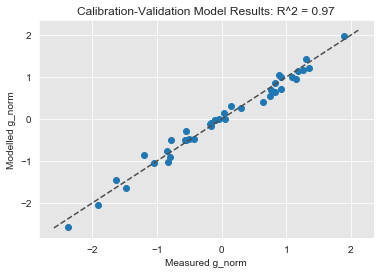

In [20]:
#visualize calibration-validation model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_calib_valid)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured g_norm')
plt.ylabel('Modelled g_norm')
plt.title('Calibration-Validation Model Results: R^2 = ' + str(R2_calib_valid)[:4])